<a href="https://colab.research.google.com/github/gabrielbaltazarmw2/Deep-Learning-Projects/blob/main/binary-classification/base_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este Notebook apresenta a construção e avaliação de um modelo de aprendizado profundo para a classificação de câncer de mama utilizando dados de um conjunto de dados específico, disponível em: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

# Diretório de trabalho

- Montagem do Google Drive e alteração do diretório de trabalho para acessar os arquivos do notebook e os dados utilizados no projeto:

In [ ]:
from google.colab import drive
import os

# Monta o drive no Google Colab
drive.mount('/content/drive',force_remount=True)

# Altera o diretório de trabalho
os.chdir('/content/drive/MyDrive/Colab Notebooks/UDEMY/DEEP LEARNING')

Mounted at /content/drive


# Importação de Pacotes e Funções

- Importação dos principais pacotes utilizados ao longo do projeto, incluindo pandas, numpy, matplotlib.pyplot, scikit-learn e keras para manipulação de dados e construção do modelo:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score

# Carregando os Dados

- Carregamento dos dados das variáveis de entrada e saída referentes ao câncer de mama:

In [ ]:
saidas = '4. classificação binária - base breast cancer/saidas_breast.csv'
entradas = '4. classificação binária - base breast cancer/entradas_breast.csv'

In [ ]:
previsores = pd.read_csv(entradas)
classe = pd.read_csv(saidas)

- Visualização das primeiras linhas dos dados para conferir sua estrutura:

In [ ]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [ ]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


## Divisão dos Dados

- Divisão dos dados em conjuntos de treinamento e teste, utilizando uma proporção de 75% para treinamento e 25% para teste:

In [ ]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)

# Rede Inicial

## Construção da Rede

- Um modelo sequencial do `Keras` foi construído com três camadas `densas` (fully connected) para classificação binária, utilizando a função de ativação `ReLU` e uma camada de saída com função `sigmoide`:

In [ ]:
classificador = Sequential()
classificador.add(Dense(units = 16, activation = 'relu',
                        kernel_initializer = 'random_uniform', input_dim = 30))
classificador.add(Dense(units = 16, activation = 'relu',
                        kernel_initializer = 'random_uniform'))
classificador.add(Dense(units = 1, activation = 'sigmoid'))

## Compilando o Modelo

- Compilação do modelo utilizando o otimizador `Adam`, a função de perda `binary_crossentropy`, e as métricas de avaliação:

In [ ]:
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy', 'AUC'])

## Treinamento

- O modelo foi treinado com 100 épocas e um tamanho de lote de 10, registrando a curva de perda, precisão e AUC ao longo do treinamento:

In [ ]:
history = classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 10, epochs = 100)

Epoch 1/100
43/43 [==============================] - 1s 3ms/step - loss: 0.7943 - binary_accuracy: 0.5657 - auc: 0.5577
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5726 - binary_accuracy: 0.6761 - auc: 0.7999
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5182 - binary_accuracy: 0.7089 - auc: 0.8321
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4768 - binary_accuracy: 0.7019 - auc: 0.8784
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4540 - binary_accuracy: 0.7934 - auc: 0.8933
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.4133 - binary_accuracy: 0.8239 - auc: 0.9054
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4098 - binary_accuracy: 0.8239 - auc: 0.8958
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.3462 - binary_accuracy: 0.8967 - auc: 0.9327
Epoch 9/100
43/43 [=====================

- Visualização das curvas de perda, precisão e AUC:

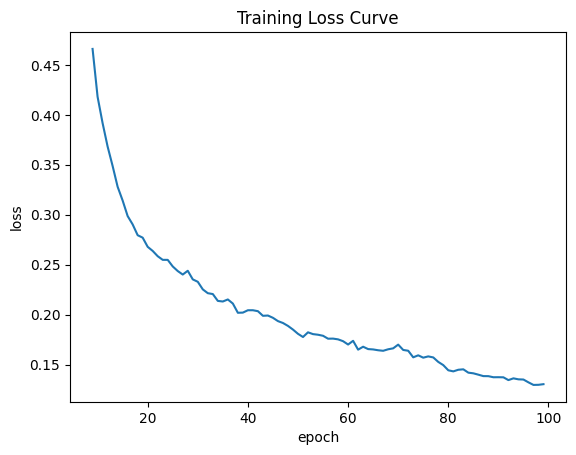

In [ ]:
loss = pd.Series(history.history['loss']).rolling(10).mean()

plt.plot( loss )
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

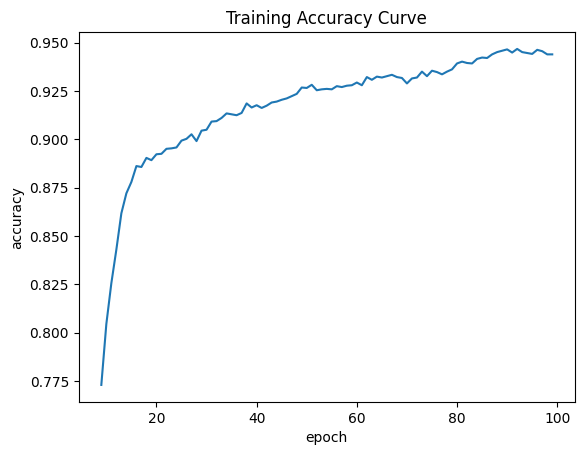

In [ ]:
acc = pd.Series(history.history['binary_accuracy']).rolling(10).mean()

plt.plot( acc )
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Training Accuracy Curve")
plt.show()

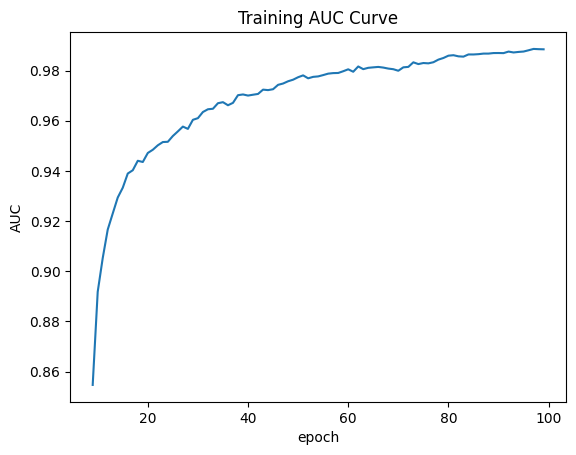

In [ ]:
auc = pd.Series(history.history['auc']).rolling(10).mean()

plt.plot( auc)
plt.ylabel("AUC")
plt.xlabel("epoch")
plt.title("Training AUC Curve")
plt.show()

## Visualizando os Pesos

- Os pesos das camadas do modelo foram visualizados para avaliação:

In [ ]:
pesos0 = classificador.layers[0].get_weights()
print(pesos0)
print(len(pesos0))
pesos1 = classificador.layers[1].get_weights()
pesos2 = classificador.layers[2].get_weights()

[array([[-5.58115542e-04,  4.68736282e-03, -7.02896481e-03,
         7.14164749e-02,  3.37862037e-02, -3.70512664e-01,
         5.01108505e-02,  3.39433886e-02, -5.54095618e-02,
         2.57543661e-02, -4.58494611e-02,  5.89132234e-02,
        -1.10322863e-01,  9.52465273e-03, -3.96890044e-02,
        -4.08933079e-03],
       [ 3.86616178e-02, -4.10179328e-03,  2.30360162e-02,
         1.12281926e-01,  9.08518061e-02, -2.06358060e-02,
        -1.59894004e-01,  9.05377269e-02,  2.84740049e-02,
        -4.89957035e-02, -6.64677024e-02,  2.76532650e-01,
        -1.68261245e-01,  8.05705227e-03,  7.61884544e-03,
         2.31073704e-02],
       [-9.59430709e-02, -2.28659481e-01, -2.30991676e-01,
         2.97943294e-01,  2.60009527e-01, -2.62533486e-01,
         4.69711348e-02,  2.72736609e-01,  1.21335993e-02,
        -2.17411593e-02, -2.79978931e-01,  1.09908439e-01,
        -1.21628344e-01, -1.04754604e-02, -2.98501074e-01,
         1.38694160e-02],
       [ 3.42851281e-02,  1.98982153

## Predições

- As predições foram feitas no conjunto de teste e o resultado foi avaliado utilizando a matriz de confusão, a métrica de precisão e a AUC:

In [ ]:
previsoes = classificador.predict(previsores_teste)
previsoes = (previsoes > 0.5)
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

resultado = classificador.evaluate(previsores_teste, classe_teste)

5/5 [==============================] - 0s 4ms/step - loss: 0.2980 - binary_accuracy: 0.9091 - auc: 0.9512


In [ ]:
matriz

array([[47,  7],
       [ 6, 83]])

- Visualização da matriz de confusão:

1 : Maligno
0 : Benigno


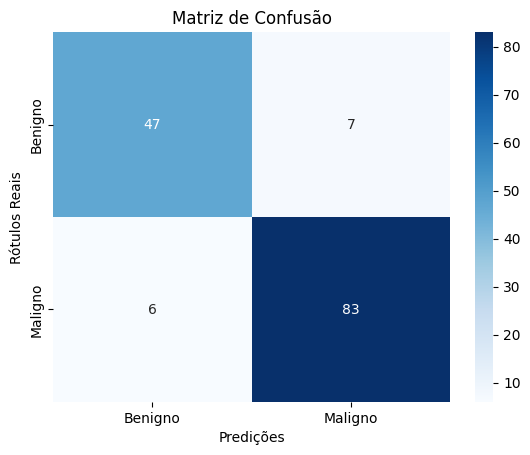

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("1 : Maligno")
print("0 : Benigno")

class_labels = ["Benigno", "Maligno"]

# Criar a matriz de confusão
cm = confusion_matrix(classe_teste, previsoes)

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_labels, yticklabels=class_labels)  # Adiciona rótulos personalizados
plt.xlabel('Predições')
plt.ylabel('Rótulos Reais')
plt.title('Matriz de Confusão')
plt.show()


- Obtenção do relatório de classificação detalhado para análise mais profunda:

In [ ]:
from sklearn.metrics import classification_report

# Relatório de classificação detalhado
classification_rep = classification_report(classe_teste, previsoes, target_names=["Benigno", "Maligno"])
print("Relatório de Classificação:")
print(classification_rep)

Relatório de Classificação:
              precision    recall  f1-score   support

     Benigno       0.89      0.87      0.88        54
     Maligno       0.92      0.93      0.93        89

    accuracy                           0.91       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143



# Validação Cruzada

- A validação cruzada foi utilizada para avaliar a robustez do modelo, com `KFold` e uma divisão em 10 folds:

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
def criarRede():
    classificador = Sequential()
    classificador.add(Dense(units = 16, activation = 'relu',
                        kernel_initializer = 'random_uniform', input_dim = 30))
    classificador.add(Dense(units = 16, activation = 'relu',
                        kernel_initializer = 'random_uniform'))
    classificador.add(Dense(units = 1, activation = 'sigmoid'))
    classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy', 'AUC'])
    return classificador

In [ ]:
# Criar o classificador usando a função definida
classificador = criarRede()

- O processo de validação cruzada foi repetido, registrando os resultados para cada fold e calculando as métricas médias e os desvios padrão:

In [ ]:
n_splits = 10
# Configurar validação cruzada manual com KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

fold_metrics = []
k = 1

# Loop para realizar validação cruzada manualmente
for train_index, test_index in kf.split(previsores):
    print(f"Processando fold {k}...")
    k += 1
    # Redefinir índices para garantir consistência
    X_train = previsores.iloc[train_index].reset_index(drop=True)
    X_test = previsores.iloc[test_index].reset_index(drop=True)
    y_train = classe.iloc[train_index].reset_index(drop=True)
    y_test = classe.iloc[test_index].reset_index(drop=True)

    # Criar e treinar o modelo
    modelo = criarRede()
    modelo.fit(X_train, y_train, epochs=100)

    # Avaliar o modelo
    resultado = modelo.evaluate(X_test, y_test)
    fold_metrics.append(resultado)

Processando fold 1...
Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 1.1463 - binary_accuracy: 0.5801 - auc: 0.6367
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4939 - binary_accuracy: 0.7246 - auc: 0.8519
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4429 - binary_accuracy: 0.7598 - auc: 0.8851
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4272 - binary_accuracy: 0.8008 - auc: 0.8841
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4057 - binary_accuracy: 0.8203 - auc: 0.8950
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3671 - binary_accuracy: 0.8262 - auc: 0.9120
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3541 - binary_accuracy: 0.8418 - auc: 0.9134
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3083 - binary_accuracy: 0.8789 - auc: 0.9392
Epoch 9/100
16/16 

- Cálculo da média e desvio padrão das métricas após todos os folds:

In [ ]:
# Média das métricas após todos os folds
mean_metrics = np.mean(fold_metrics, axis=0)
loss_mean = mean_metrics[0]
accuracy_mean = mean_metrics[1]
auc_mean = mean_metrics[2]

print(f'Métricas médias após {n_splits}-Fold Cross-Validation: {mean_metrics}')
print(f'Média da Perda: {loss_mean:.3f}')
print(f'Média da Acurácia: {accuracy_mean:.3f}')
print(f'Média do AUC: {auc_mean:.3f}')

Métricas médias após 10-Fold Cross-Validation: [0.31390809 0.897995   0.94767845]
Média da Perda: 0.314
Média da Acurácia: 0.898
Média do AUC: 0.948


In [ ]:
# Calcular o desvio padrão para cada métrica
std_devs = np.std(fold_metrics, axis=0)
loss_std = std_devs[0]
accuracy_std = std_devs[1]
auc_std = std_devs[2]

print(f'Desvio padrão das métricas após {n_splits}-Fold Cross-Validation: {std_devs}')
print(f'Desvio padrão da Perda: {loss_std:.3f}')
print(f'Desvio padrão da Acurácia: {accuracy_std:.3f}')
print(f'Desvio padrão do AUC: {auc_std:.3f}')

Desvio padrão das métricas após 10-Fold Cross-Validation: [0.19479248 0.04515523 0.04065643]
Desvio padrão da Perda: 0.195
Desvio padrão da Acurácia: 0.045
Desvio padrão do AUC: 0.041


- Visualização dos resultados por meio de gráficos de barras para cada métrica ao longo dos folds:

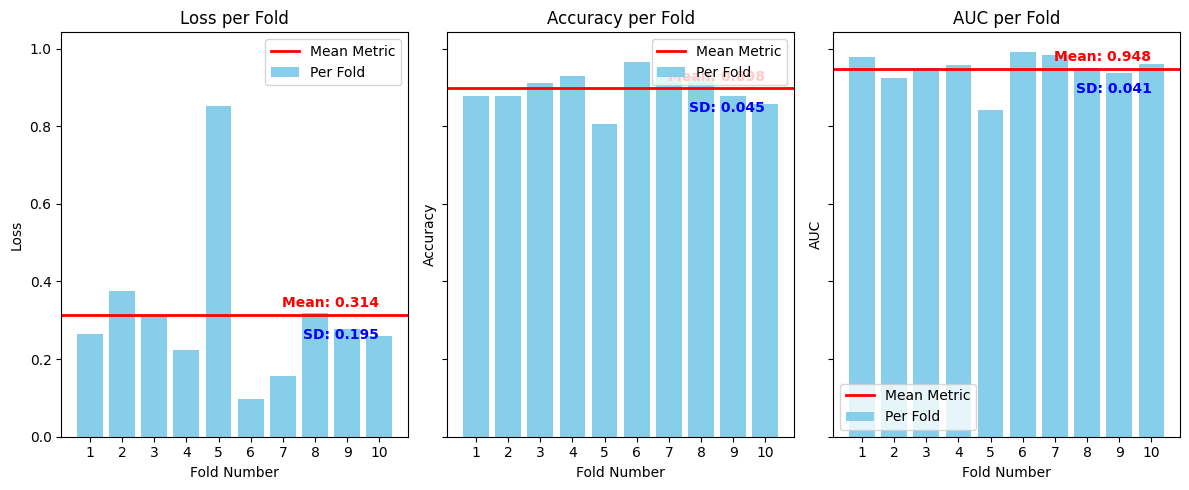

In [ ]:
# Nomes das métricas
metric_names = ['Loss', 'Accuracy', 'AUC']

fold_metrics_np = np.array(fold_metrics)

# Criar um plot para cada métrica
fig, axs = plt.subplots(1, len(metric_names), figsize=(12, 5), sharey=True)

for i, metric_name in enumerate(metric_names):

    # Extrair a métrica específica de todos os folds
    metric_values = fold_metrics_np[:, i]

    # Índices para o eixo x
    x = np.arange(len(metric_values)) + 1  # Folds 1 a K

    # Plotando as métricas de cada fold
    axs[i].bar(x, metric_values, color='skyblue', label='Per Fold')

    # Linha horizontal para a média
    axs[i].axhline(y=mean_metrics[i], color='red', linewidth=2, label='Mean Metric')

    # Anotação para a média
    axs[i].text(x=len(metric_values), y=mean_metrics[i] + 0.03, s=f'Mean: {mean_metrics[i]:.3f}',
                color='red', va='center', ha='right', fontweight='bold')

    # Anotação para o desvio padrão
    axs[i].text(x=len(metric_values), y=mean_metrics[i] - 0.07, s=f'SD: {std_devs[i]:.3f}',
                color='blue', va='bottom', ha='right', fontweight='bold')

    # Adicionando título e fazendo ajustes no eixo
    axs[i].set_title(f'{metric_name} per Fold')
    axs[i].set_xlabel('Fold Number')
    axs[i].set_xticks(x)
    axs[i].set_ylabel(metric_name)
    axs[i].legend()

# Mostrar o plot
plt.tight_layout()
plt.show()

# Overfitting e Dropout

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
def criarRede():
    classificador = Sequential()
    classificador.add(Dense(units = 16, activation = 'relu',
                        kernel_initializer = 'random_uniform', input_dim = 30))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = 16, activation = 'relu',
                        kernel_initializer = 'random_uniform'))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = 1, activation = 'sigmoid'))
    classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy', 'AUC'])
    return classificador

In [ ]:
# Criar o classificador usando a função definida
classificador = criarRede()

In [ ]:
n_splits = 10
# Configurar validação cruzada manual com KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

fold_metrics = []
k = 1

# Loop para realizar validação cruzada manualmente
for train_index, test_index in kf.split(previsores):
    print(f"Processando fold {k}...")
    k += 1
    # Redefinir índices para garantir consistência
    X_train = previsores.iloc[train_index].reset_index(drop=True)
    X_test = previsores.iloc[test_index].reset_index(drop=True)
    y_train = classe.iloc[train_index].reset_index(drop=True)
    y_test = classe.iloc[test_index].reset_index(drop=True)

    # Criar e treinar o modelo
    modelo = criarRede()
    modelo.fit(X_train, y_train, epochs=100)

    # Avaliar o modelo
    resultado = modelo.evaluate(X_test, y_test)
    fold_metrics.append(resultado)

Processando fold 1...
Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 1.6338 - binary_accuracy: 0.5254 - auc: 0.5532
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8334 - binary_accuracy: 0.6191 - auc: 0.6636
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6495 - binary_accuracy: 0.6289 - auc: 0.7259
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5603 - binary_accuracy: 0.6836 - auc: 0.7868
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5641 - binary_accuracy: 0.6855 - auc: 0.8014
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5686 - binary_accuracy: 0.6816 - auc: 0.7761
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5327 - binary_accuracy: 0.7207 - auc: 0.8166
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5288 - binary_accuracy: 0.7363 - auc: 0.8086
Epoch 9/100
16/16 

In [ ]:
# Média das métricas após todos os folds
mean_metrics = np.mean(fold_metrics, axis=0)
loss_mean = mean_metrics[0]
accuracy_mean = mean_metrics[1]
auc_mean = mean_metrics[2]

print(f'Métricas médias após {n_splits}-Fold Cross-Validation: {mean_metrics}')
print(f'Média da Perda: {loss_mean:.3f}')
print(f'Média da Acurácia: {accuracy_mean:.3f}')
print(f'Média do AUC: {auc_mean:.3f}')

Métricas médias após 10-Fold Cross-Validation: [0.34728453 0.8875     0.93814966]
Média da Perda: 0.347
Média da Acurácia: 0.887
Média do AUC: 0.938


In [ ]:
# Calcular o desvio padrão para cada métrica
std_devs = np.std(fold_metrics, axis=0)
loss_std = std_devs[0]
accuracy_std = std_devs[1]
auc_std = std_devs[2]

print(f'Desvio padrão das métricas após {n_splits}-Fold Cross-Validation: {std_devs}')
print(f'Desvio padrão da Perda: {loss_std:.3f}')
print(f'Desvio padrão da Acurácia: {accuracy_std:.3f}')
print(f'Desvio padrão do AUC: {auc_std:.3f}')

Desvio padrão das métricas após 10-Fold Cross-Validation: [0.20713395 0.03261652 0.04034891]
Desvio padrão da Perda: 0.207
Desvio padrão da Acurácia: 0.033
Desvio padrão do AUC: 0.040


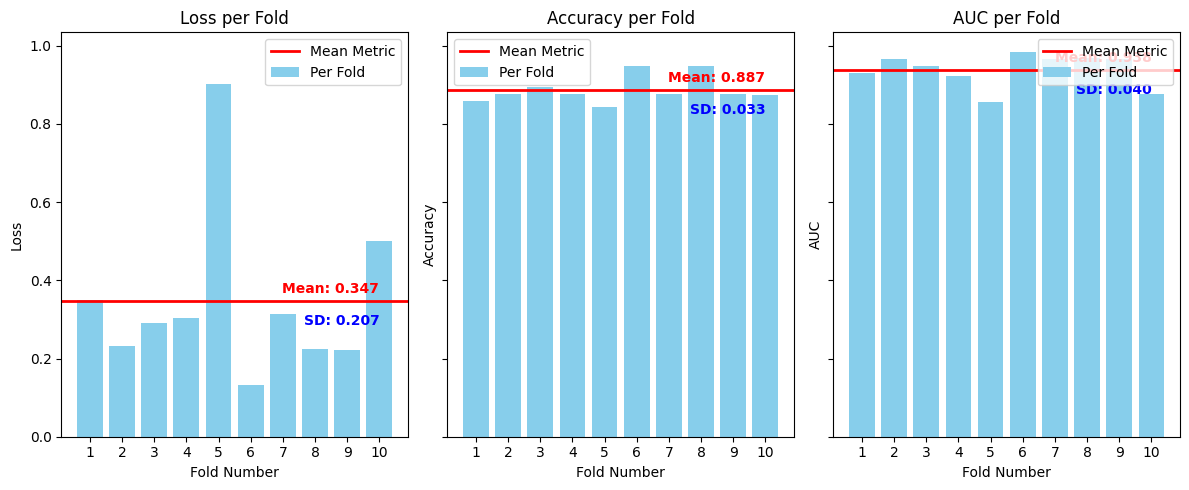

In [ ]:
# Nomes das métricas
metric_names = ['Loss', 'Accuracy', 'AUC']

fold_metrics_np = np.array(fold_metrics)

# Criar um plot para cada métrica
fig, axs = plt.subplots(1, len(metric_names), figsize=(12, 5), sharey=True)

for i, metric_name in enumerate(metric_names):

    # Extrair a métrica específica de todos os folds
    metric_values = fold_metrics_np[:, i]

    # Índices para o eixo x
    x = np.arange(len(metric_values)) + 1  # Folds 1 a K

    # Plotando as métricas de cada fold
    axs[i].bar(x, metric_values, color='skyblue', label='Per Fold')

    # Linha horizontal para a média
    axs[i].axhline(y=mean_metrics[i], color='red', linewidth=2, label='Mean Metric')

    # Anotação para a média
    axs[i].text(x=len(metric_values), y=mean_metrics[i] + 0.03, s=f'Mean: {mean_metrics[i]:.3f}',
                color='red', va='center', ha='right', fontweight='bold')

    # Anotação para o desvio padrão
    axs[i].text(x=len(metric_values), y=mean_metrics[i] - 0.07, s=f'SD: {std_devs[i]:.3f}',
                color='blue', va='bottom', ha='right', fontweight='bold')

    # Adicionando título e fazendo ajustes no eixo
    axs[i].set_title(f'{metric_name} per Fold')
    axs[i].set_xlabel('Fold Number')
    axs[i].set_xticks(x)
    axs[i].set_ylabel(metric_name)
    axs[i].legend()

# Mostrar o plot
plt.tight_layout()
plt.show()

# Hiperparametrização

- Uma busca por hiperparâmetros foi conduzida utilizando uma combinação de diferentes valores de parâmetros para otimizar o desempenho do modelo. Foram utilizadas várias configurações de parâmetros, incluindo otimizadores, funções de perda, ativadores, e tamanho de lote:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import KFold
import itertools  # Para criar todas as combinações possíveis de parâmetros
import numpy as np

# Função para criar a rede neural com parâmetros configuráveis
def criarRede(optimizer, loss, kernel_initializer, activation, neurons):
    classificador = Sequential()
    classificador.add(Dense(units=neurons, activation=activation,
                            kernel_initializer=kernel_initializer, input_dim=30))
    classificador.add(Dense(units=neurons, activation=activation,
                            kernel_initializer=kernel_initializer))
    classificador.add(Dense(units=1, activation='sigmoid'))
    classificador.compile(optimizer=optimizer, loss=loss,
                          metrics=['binary_accuracy'])
    return classificador

# Definir hiperparâmetros a serem testados
parametros = {
    'batch_size': [10, 30],
    'epochs': [50],
    'optimizer': ['adam', 'RMSprop'],
    'loss': ['binary_crossentropy'],
    'kernel_initializer': ['normal'],
    'activation': ['relu', 'tanh'],
    'neurons': [32, 16, 8]
}

# Gerar todas as combinações de hiperparâmetros
combinacoes = list(itertools.product(*parametros.values()))

# Configurar validação cruzada
kf = KFold(n_splits=3, shuffle=True, random_state=1)

# Lista para armazenar resultados
resultados = []

# Loop para testar cada combinação de hiperparâmetros
for combinacao in combinacoes:
    # Desempacotar a combinação para treinar o modelo
    hyperparams = dict(zip(parametros.keys(), combinacao))
    print(f"Testando combinação: {hyperparams}")

    # Lista para armazenar precisão de cada fold
    fold_accuracies = []

    # Loop para validação cruzada
    for train_idx, test_idx in kf.split(previsores):
        # Criar o modelo, sem 'batch_size'
        modelo = criarRede(
            optimizer=hyperparams['optimizer'],
            loss=hyperparams['loss'],
            kernel_initializer=hyperparams['kernel_initializer'],
            activation=hyperparams['activation'],
            neurons=hyperparams['neurons']
        )

        # Treinamento e avaliação do modelo
        X_train = previsores.iloc[train_idx].reset_index(drop=True)
        y_train = classe.iloc[train_idx].reset_index(drop=True)
        modelo.fit(X_train, y_train, epochs=hyperparams['epochs'], batch_size=hyperparams['batch_size'], verbose=0)

        X_test = previsores.iloc[test_idx].reset_index(drop=True)
        y_test = classe.iloc[test_idx].reset_index(drop=True)
        _, accuracy = modelo.evaluate(X_test, y_test, verbose=0)  # Obter precisão
        fold_accuracies.append(accuracy)

    # Calcular a média de precisão para cada combinação
    media = np.mean(fold_accuracies)  # Calcular a média das precisões dos folds
    resultados.append((hyperparams, media))  # Armazenar hiperparâmetros e precisão média

# Ordenar resultados por precisão para encontrar a melhor combinação
resultados.sort(key=lambda x: x[1], reverse=True)

print("Melhor combinação de hiperparâmetros:", resultados[0][0])
print("Melhor precisão:", resultados[0][1])


Testando combinação: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'kernel_initializer': 'normal', 'activation': 'relu', 'neurons': 32}
Testando combinação: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'kernel_initializer': 'normal', 'activation': 'relu', 'neurons': 16}
Testando combinação: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'kernel_initializer': 'normal', 'activation': 'relu', 'neurons': 8}
Testando combinação: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'kernel_initializer': 'normal', 'activation': 'tanh', 'neurons': 32}
Testando combinação: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'kernel_initializer': 'normal', 'activation': 'tanh', 'neurons': 16}
Testando combinação: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'kernel_initializer'

- A melhor combinação de hiperparâmetros foi determinada pela maior precisão média:

In [ ]:
# Ordenar resultados por precisão para encontrar a melhor combinação
resultados.sort(key=lambda x: x[1], reverse=True)

print("Melhor combinação de hiperparâmetros:", resultados[0][0])
print("Melhor precisão:", resultados[0][1])

Melhor combinação de hiperparâmetros: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam', 'loss': 'binary_crossentropy', 'kernel_initializer': 'normal', 'activation': 'relu', 'neurons': 8}
Melhor precisão: 0.9033973813056946


# Rede Final

- A rede final foi treinada com os melhores hiperparâmetros e o histórico do treinamento foi registrado para análise posterior:

In [ ]:
# Função para criar a rede neural com parâmetros configuráveis
def criarRede(optimizer, loss, kernel_initializer, activation, neurons):
    classificador = Sequential()
    classificador.add(Dense(units=neurons, activation=activation,
                            kernel_initializer=kernel_initializer, input_dim=30))
    classificador.add(Dense(units=neurons, activation=activation,
                            kernel_initializer=kernel_initializer))
    classificador.add(Dense(units=1, activation='sigmoid'))
    classificador.compile(optimizer=optimizer, loss=loss,
                          metrics=['binary_accuracy', 'AUC'])
    return classificador

In [ ]:
classificador = criarRede(optimizer='adam', loss='binary_crossentropy',
                          kernel_initializer='normal', activation='relu', neurons=8)

In [ ]:
history = classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 10, epochs = 50)

Epoch 1/500
43/43 [==============================] - 1s 2ms/step - loss: 0.9938 - binary_accuracy: 0.5892 - auc: 0.6284
Epoch 2/500
43/43 [==============================] - 0s 3ms/step - loss: 0.5666 - binary_accuracy: 0.6385 - auc: 0.7015
Epoch 3/500
43/43 [==============================] - 0s 2ms/step - loss: 0.5601 - binary_accuracy: 0.6362 - auc: 0.7054
Epoch 4/500
43/43 [==============================] - 0s 3ms/step - loss: 0.5557 - binary_accuracy: 0.6408 - auc: 0.7189
Epoch 5/500
43/43 [==============================] - 0s 2ms/step - loss: 0.5387 - binary_accuracy: 0.6338 - auc: 0.7210
Epoch 6/500
43/43 [==============================] - 0s 2ms/step - loss: 0.5532 - binary_accuracy: 0.6362 - auc: 0.7160
Epoch 7/500
43/43 [==============================] - 0s 2ms/step - loss: 0.5443 - binary_accuracy: 0.6408 - auc: 0.7228
Epoch 8/500
43/43 [==============================] - 0s 2ms/step - loss: 0.5448 - binary_accuracy: 0.6385 - auc: 0.7152
Epoch 9/500
43/43 [=====================

- Visualização das curvas de perda, precisão e AUC ao longo do treinamento final:

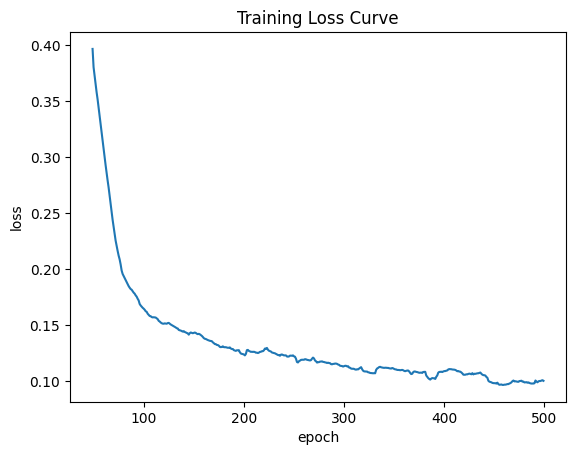

In [ ]:
loss = pd.Series(history.history['loss']).rolling(50).mean()

plt.plot( loss )
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

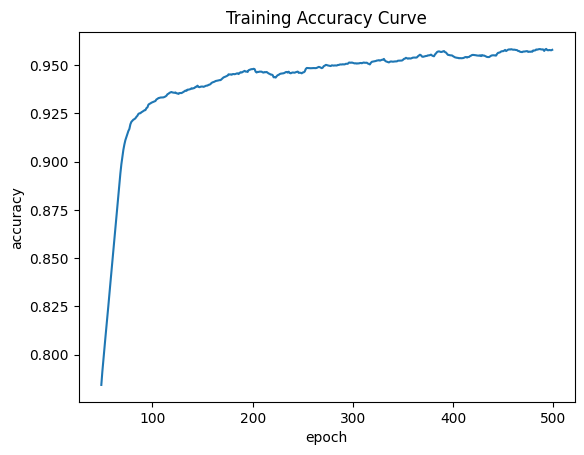

In [ ]:
acc = pd.Series(history.history['binary_accuracy']).rolling(50).mean()

plt.plot( acc )
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Training Accuracy Curve")
plt.show()

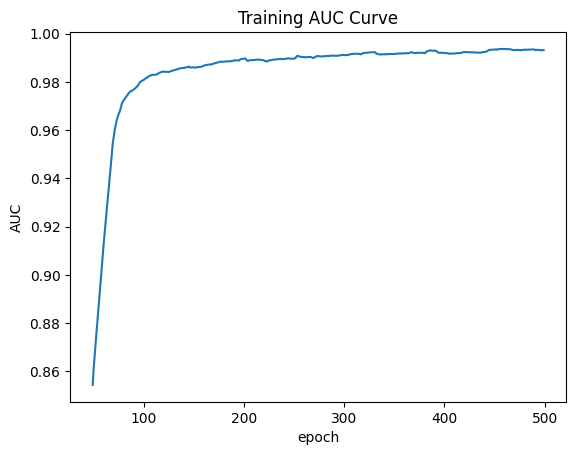

In [ ]:
auc = pd.Series(history.history['auc']).rolling(50).mean()

plt.plot( auc)
plt.ylabel("AUC")
plt.xlabel("epoch")
plt.title("Training AUC Curve")
plt.show()

## Salvando e Carregando o Modelo

- O modelo foi salvo para uso futuro e testado para garantir a precisão das predições:

In [ ]:
# Salvar o modelo
classificador.save("4. classificação binária - base breast cancer/breast cancer model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Carregar o modelo
classificador = tf.keras.models.load_model("4. classificação binária - base breast cancer/breast cancer model.h5")

## Predições

- Predições foram realizadas com o modelo carregado, obtendo a matriz de confusão e precisão:

In [ ]:
previsoes = classificador.predict(previsores_teste)
previsoes = (previsoes > 0.5)
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

resultado = classificador.evaluate(previsores_teste, classe_teste)

5/5 [==============================] - 0s 4ms/step - loss: 0.5020 - binary_accuracy: 0.9021 - auc: 0.9437


In [ ]:
matriz

array([[45,  9],
       [ 5, 84]])

- Visualização da matriz de confusão:

1 : Maligno
0 : Benigno


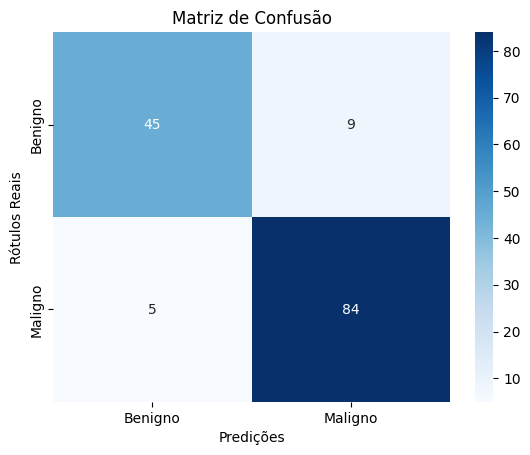

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("1 : Maligno")
print("0 : Benigno")

class_labels = ["Benigno", "Maligno"]

# Criar a matriz de confusão
cm = confusion_matrix(classe_teste, previsoes)

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_labels, yticklabels=class_labels)  # Adiciona rótulos personalizados
plt.xlabel('Predições')
plt.ylabel('Rótulos Reais')
plt.title('Matriz de Confusão')
plt.show()


- Relatório de classificação detalhado para análise dos resultados finais:

In [ ]:
from sklearn.metrics import classification_report

# Relatório de classificação detalhado
classification_rep = classification_report(classe_teste, previsoes, target_names=["Benigno", "Maligno"])
print("Relatório de Classificação:")
print(classification_rep)

Relatório de Classificação:
              precision    recall  f1-score   support

     Benigno       0.90      0.83      0.87        54
     Maligno       0.90      0.94      0.92        89

    accuracy                           0.90       143
   macro avg       0.90      0.89      0.89       143
weighted avg       0.90      0.90      0.90       143

